In [1]:
import pydotplus #visualize the decision tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns#visualize the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz#visualize the decision tree
from sklearn.externals.six import StringIO#store the text from the decision tree
from IPython.display import Image#viewing the image
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

C:\Users\akshaya\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#to analyze the heart disease patients using the classification techniques like logistic Regression,decission tree,Random forest

In [3]:
data=pd.read_csv("Downloads/heart (1).csv")

In [4]:
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,2,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,3,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,4,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,5,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [5]:
data.describe

<bound method NDFrame.describe of      Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0             1   63    1   3       145   233    1        0      150      0   
1             2   37    1   2       130   250    0        1      187      0   
2             3   41    0   1       130   204    0        0      172      0   
3             4   56    1   1       120   236    0        1      178      0   
4             5   57    0   0       120   354    0        1      163      1   
..          ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
298         299   57    0   0       140   241    0        1      123      1   
299         300   45    1   3       110   264    0        1      132      0   
300         301   68    1   0       144   193    1        1      141      0   
301         302   57    1   0       130   131    0        1      115      1   
302         303   57    0   1       130   236    0        0      174      0   

     oldpeak  slo

In [6]:
data.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
target        0
dtype: int64

In [7]:
#we have a categorical variable as the target hence we will be applying the classification problem and solve further


In [8]:
#determining the correlation
corr=data.corr()

In [9]:
corr

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
Unnamed: 0,1.000000,0.185153,0.201132,-0.399163,0.108507,0.020258,0.000743,-0.021130,-0.404972,0.363788,0.298161,-0.276484,0.384962,-0.862585
age,0.185153,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,-0.225439
sex,0.201132,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,-0.280937
cp,-0.399163,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,0.433798
trestbps,0.108507,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,-0.144931
chol,0.020258,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,-0.085239
fbs,0.000743,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.028046
restecg,-0.021130,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,0.137230
thalach,-0.404972,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,0.421741
exang,0.363788,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,-0.436757


Text(0.5, 1.0, '[0]:Does not have heart disease [1]: Does have heart disease')

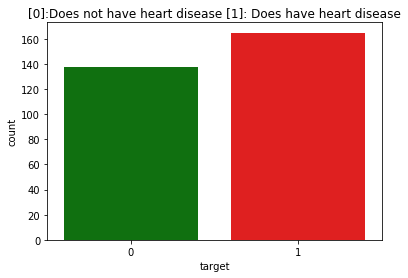

In [10]:
#visualizing the no. of persons having heart disease and not having heart disease
sns.countplot(data["target"],palette=["green","red"])
plt.title("[0]:Does not have heart disease [1]: Does have heart disease")

In [11]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

[]

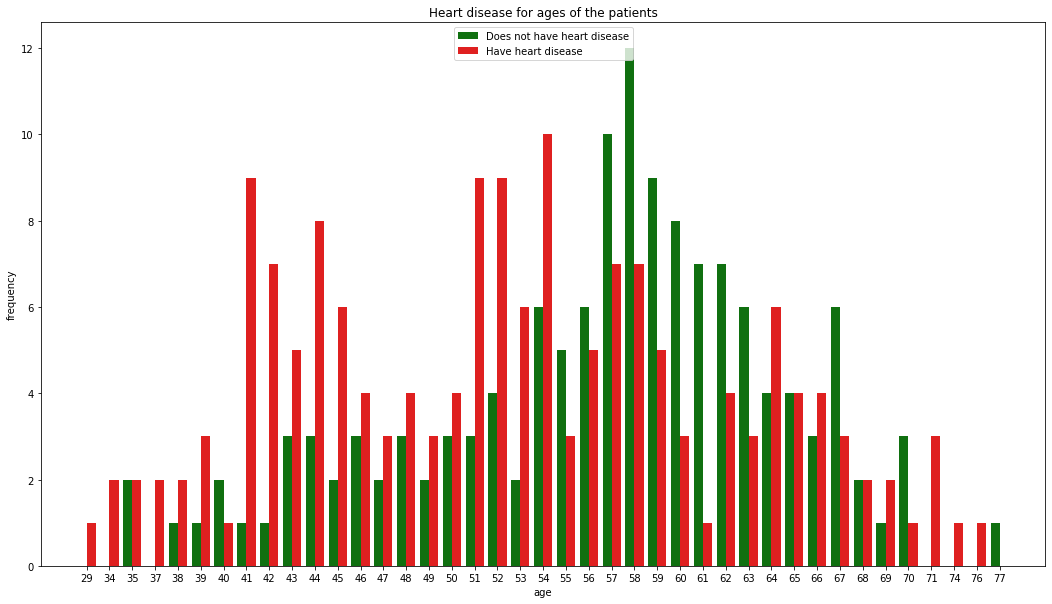

In [12]:
#visualize age and whether person has heart disease or not
plt.figure(figsize=(18,10))
sns.countplot(x=data["age"],hue=data["target"],palette=["green","red"])
plt.legend(["Does not have heart disease","Have heart disease"])
plt.title("Heart disease for ages of the patients")
plt.xlabel("age")
plt.ylabel("frequency")
plt.plot()

[]

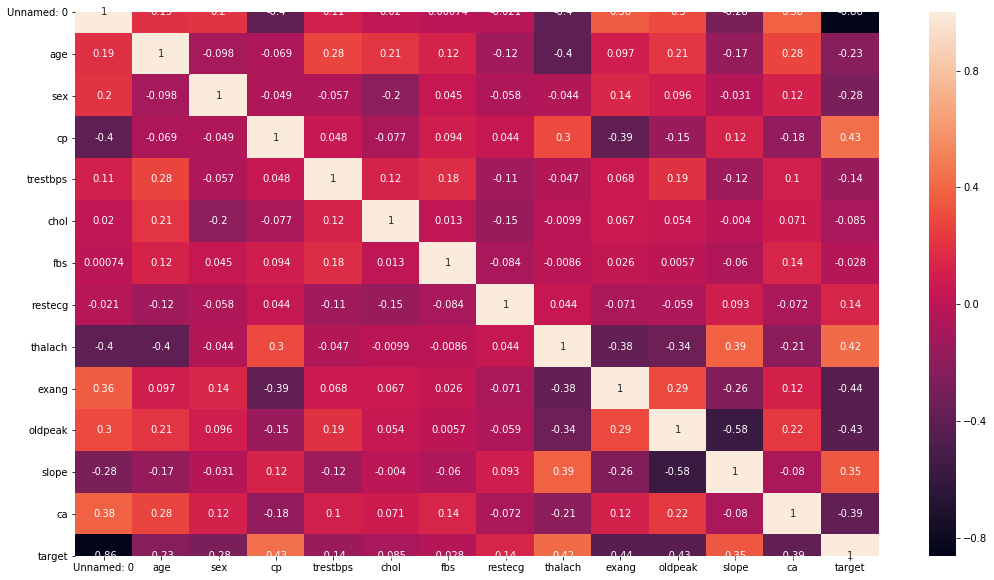

In [13]:
#visualizing correlations using the heatmaps
plt.figure(figsize=(18,10))
sns.heatmap(corr,annot=True)#annot denotes the values of correlation in the image
plt.plot()

In [14]:
#BUILDING A LOGISTIC REGRESSION MODEL

In [15]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
model=LogisticRegression()

In [18]:
model.fit(x_train,y_train)

C:\Users\akshaya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred=model.predict(x_test)

In [20]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [21]:
accracy=accuracy_score(y_test,y_pred)

In [22]:
accracy

0.967032967032967

In [23]:
cm=confusion_matrix(y_test,y_pred)

In [24]:
cm

array([[42,  2],
       [ 1, 46]], dtype=int64)

In [25]:
report1=classification_report(y_pred,y_test,output_dict=True)

In [26]:
report1

{'0': {'precision': 0.9545454545454546,
  'recall': 0.9767441860465116,
  'f1-score': 0.9655172413793104,
  'support': 43},
 '1': {'precision': 0.9787234042553191,
  'recall': 0.9583333333333334,
  'f1-score': 0.968421052631579,
  'support': 48},
 'accuracy': 0.967032967032967,
 'macro avg': {'precision': 0.9666344294003868,
  'recall': 0.9675387596899225,
  'f1-score': 0.9669691470054447,
  'support': 91},
 'weighted avg': {'precision': 0.9672986587880205,
  'recall': 0.967032967032967,
  'f1-score': 0.9670489220398477,
  'support': 91}}

In [27]:
pd.DataFrame(report1)

,0,1,accuracy,macro avg,weighted avg
precision,0.954545,0.978723,0.967033,0.966634,0.967299
recall,0.976744,0.958333,0.967033,0.967539,0.967033
f1-score,0.965517,0.968421,0.967033,0.966969,0.967049
support,43.000000,48.000000,0.967033,91.000000,91.000000


In [28]:
#         PREDICTED
#        _0____1__
#ACTUAL 0 | 42  2
#ACTUAL 1 |  1  46
#HERE WE KNOW THAT THE ONLY 2 PERSONS WHICH ARE NOT HAVING DISEASE ARE PREDICTED WRONGLY
# AND ONLY 1 PERSON WHO HAS DISEASE IS NOT PREDICTED CORRECTLY

In [29]:
#BUILDING A DECESSION TREE MODEL

In [30]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
model=DecisionTreeClassifier()

In [33]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
y_pred=model.predict(x_test)

In [35]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [36]:
dec_score=accuracy_score(y_test,y_pred)

In [37]:
dec_score

1.0

In [38]:
dec_cm=confusion_matrix(y_test,y_pred)

In [39]:
dec_cm

array([[44,  0],
       [ 0, 47]], dtype=int64)

In [40]:
#visualizing the decession tree 


In [41]:
dot_data=StringIO()#import the text file from the model

In [42]:
export_graphviz(model,out_file=dot_data)

In [43]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
#dot_data.getvalue()

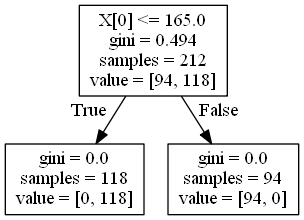

In [44]:
Image(graph.create_png())

In [45]:
report2=classification_report(y_pred,y_test,output_dict=True)

In [46]:
report2

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 44},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 47},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 91},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 91}}

In [47]:
#Creating the random forest model

In [48]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [50]:
model=RandomForestClassifier()

In [51]:
model.fit(x_train,y_train)

C:\Users\akshaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_pred=model.predict(x_test)

In [53]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [54]:
rand_acc=accuracy_score(y_test,y_pred)

In [55]:
rand_acc

1.0

In [56]:
rf_cm=confusion_matrix(y_test,y_pred)

In [57]:
rf_cm

array([[44,  0],
       [ 0, 47]], dtype=int64)

In [58]:
dot_data=StringIO()#import the text file from the model

In [59]:
export_graphviz(model.estimators_[0],out_file=dot_data)

In [60]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

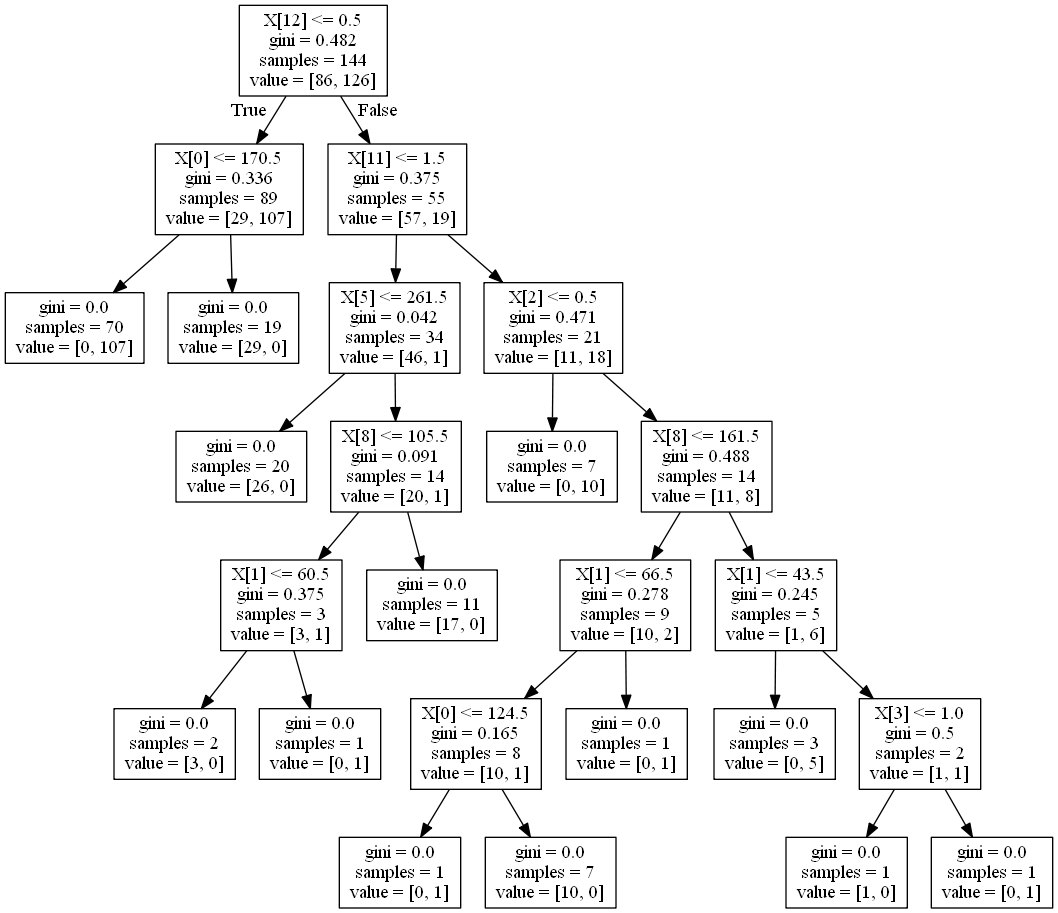

In [61]:
Image(graph.create_png())

In [62]:
scores_dic={"logistic_reg":[accracy],"decission_tree":[dec_score],"random_forest":[rand_acc]}

In [63]:
scores_df=pd.DataFrame(scores_dic)

In [64]:
scores_df

,logistic_reg,decission_tree,random_forest
0,0.967033,1.0,1.0


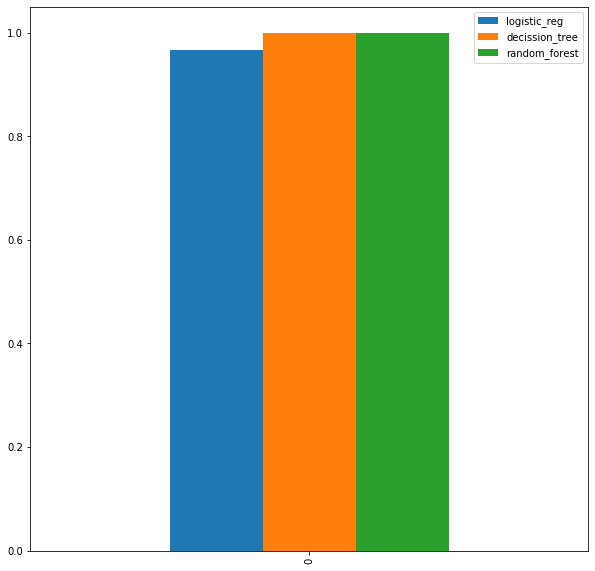

In [65]:
scores_df.plot(kind="bar",figsize=(10,10))

In [66]:
matrix_dic={"logistic_reg":[cm],"decission_tree":[dec_cm],"random_forest":[rf_cm]}

ValueError: Must pass 2-d input

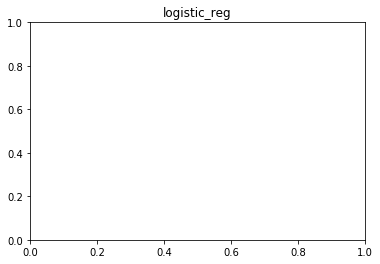

In [67]:
for label,matrix in matrix_dic.items():
    plt.title(label=label)
    sns.heatmap(matrix, annot=True)
    plt.show()

In [68]:
#building the classification report
report3=classification_report(y_pred,y_test,output_dict=True)

In [69]:
report3

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 44},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 47},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 91},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 91}}

In [70]:
report_dic={"logistic_reg":[pd.DataFrame(report1)],"decission_tree":[pd.DataFrame(report2)],"random_forest":[pd.DataFrame(report3)]}

In [71]:
report_dic

{'logistic_reg': [                   0          1  accuracy  macro avg  weighted avg
  precision   0.954545   0.978723  0.967033   0.966634      0.967299
  recall      0.976744   0.958333  0.967033   0.967539      0.967033
  f1-score    0.965517   0.968421  0.967033   0.966969      0.967049
  support    43.000000  48.000000  0.967033  91.000000     91.000000],
 'decission_tree': [              0     1  accuracy  macro avg  weighted avg
  precision   1.0   1.0       1.0        1.0           1.0
  recall      1.0   1.0       1.0        1.0           1.0
  f1-score    1.0   1.0       1.0        1.0           1.0
  support    44.0  47.0       1.0       91.0          91.0],
 'random_forest': [              0     1  accuracy  macro avg  weighted avg
  precision   1.0   1.0       1.0        1.0           1.0
  recall      1.0   1.0       1.0        1.0           1.0
  f1-score    1.0   1.0       1.0        1.0           1.0
  support    44.0  47.0       1.0       91.0          91.0]}

In [72]:
#since we predict the best model based on these techniques.